<a href="https://colab.research.google.com/github/JMML2021/0301_visualitzaci-_explorat-ria/blob/main/S03_T01_Visualitzaci%C3%B3_gr%C3%A0fica_d'un_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectiu general: 

Entendre i aplicar les diferents tècniques de visualització amb Python  
Objectius específics: 

Conèixer les diferents llibreries Matplotlib i Seaborn
Si algun recurs de towardsdatascience o medium demana registre, proveu d’obrir-lo en finestra d’incògnit.

 **# - Exercici 1**:

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

Una variable categòrica (UniqueCarrier)
Una variable numèrica (ArrDelay)
Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
Dues variables numèriques (ArrDelay i DepDelay)
Tres variables (ArrDelay, DepDelay i UniqueCarrier)
Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd          # El comando pwd (de las siglas en inglés print working directory, cuya traducción sería imprimir directorio de trabajo) se utiliza para imprimir el nombre

/content


In [3]:
# !pip install automl

In [4]:
#from goolge.colab import drive
#drive mount('/content/gdriven')

In [5]:
!ls
# https://www.youtube.com/watch?v=SDaC2bLKrFg

sample_data


In [69]:
# Despues me interesará tener codificado AirTime en multiplos de 60 minutos
df['codAirTime'] = round((df.AirTime/60),0)*60


In [6]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/roberthryniewicz/datasets/master/airline-dataset/flights/flights.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Cargo la informacion del dataset de aquí:


---
*https://github.com/mdrilwan/datasets*

#Una variable categòrica (UniqueCarrier)

In [70]:
# Hago listado de las compañías.

dfUniqueCarrier = df.UniqueCarrier.unique()
dfUniqueCarrier



array(['WN', 'XE'], dtype=object)

In [71]:
#Odeno por distacia
df1=df1.sort_values(by = 'Distance', ascending= False, ignore_index=True)
df1['Distance']

retrasoLagos = df1.head(10)
print('\nListado de los 10 vuelos más largos en distancia, con su origen y destino')
retrasoLagos[['Distance','Origin', 'Dest' ]]

NameError: ignored

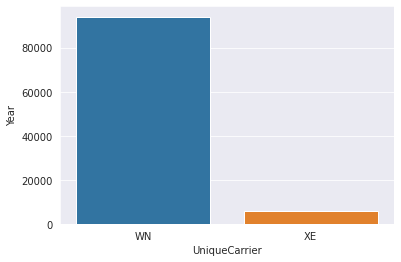

In [72]:
# Cuento las compañias que hay y la frecuencai con que se repite:
df2= df.groupby(df['UniqueCarrier']).count()
df2 = df2.rename_axis('UniqueCarrier').reset_index()
df2

sns.set_style('darkgrid')
sns.barplot(x = "UniqueCarrier", y = "Year", data = df2)
plt.show()

Text(0.5, 1.0, 'Porcentaje en el nº de vuelos de las 2 compañías')

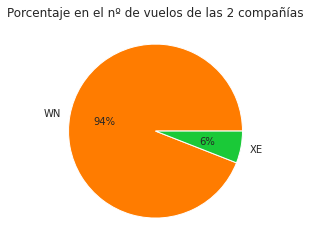

In [111]:
#define Seaborn color palette to use
 
colors = sns.color_palette('bright')[1:5] 

plt.pie(df2.Year, labels= df2.UniqueCarrier , autopct='%.0f%%', colors=colors )
plt.title('Porcentaje en el nº de vuelos de las 2 compañías')


**Una variable numèrica (ArrDelay)**




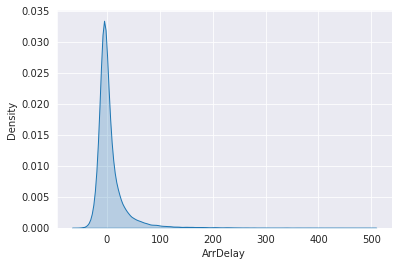

In [73]:
sns.kdeplot(df.ArrDelay, shade = True)
#sns.kdeplot(df.ArrDelay, cumulative=True)

Veo que la distribución no es normal y que hay muchos atípicos o outliers. Reduzco a unos valores de retraso que "yo" considero como normales (hora y media máximo)

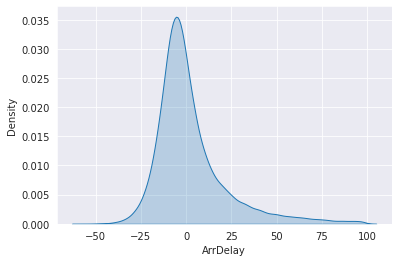

In [74]:
df3= df[df.ArrDelay < 100]
sns.kdeplot(df3.ArrDelay, shade = True)

**Dues variables numèriques (ArrDelay i DepDelay)**

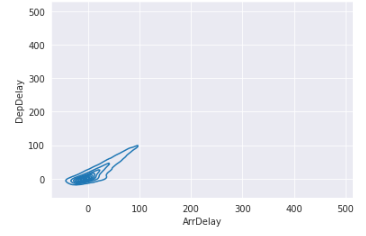

In [31]:
# sns.kdeplot(df.ArrDelay, df.DepDelay)
print('Lo bloqueo pq tarda mucho en representar')

Lo bloqueo pq tarda mucho en representar


**Tres variables (ArrDelay, DepDelay i UniqueCarrier)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


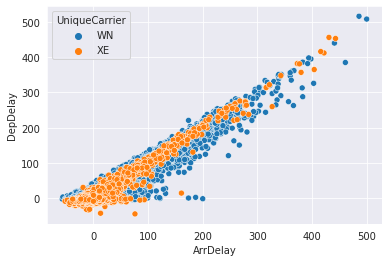

In [75]:
sns.scatterplot(df.ArrDelay, df.DepDelay, hue= df.UniqueCarrier)

**Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


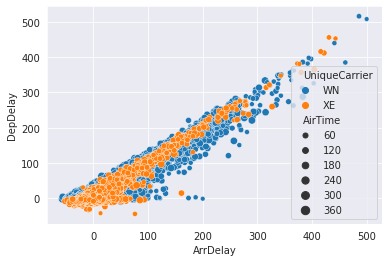

In [37]:
sns.scatterplot(df.ArrDelay, df.DepDelay, hue= df.UniqueCarrier, size=df.AirTime)

Una variable categòrica (UniqueCarrier) Una variable numèrica (ArrDelay) Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) 

**Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


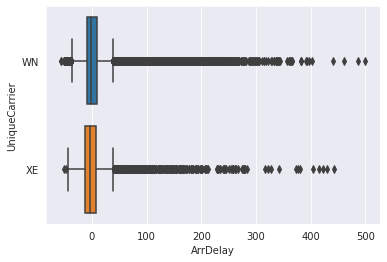

In [76]:
sns.boxplot(df.ArrDelay, df.UniqueCarrier)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


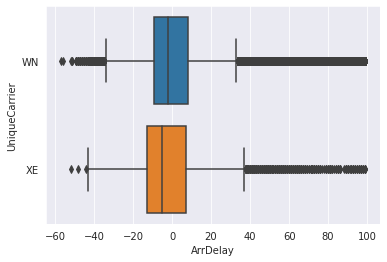

In [77]:
sns.boxplot(df3.ArrDelay, df3.UniqueCarrier)

Vemos que hay muchos outlier y no permiten ver que pasa. Filtro los datos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


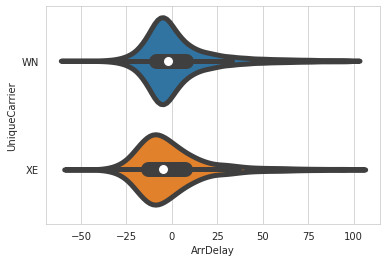

In [44]:
sns.set_style('whitegrid')
sns.violinplot(df3.ArrDelay, df3.UniqueCarrier, linewidth=5)

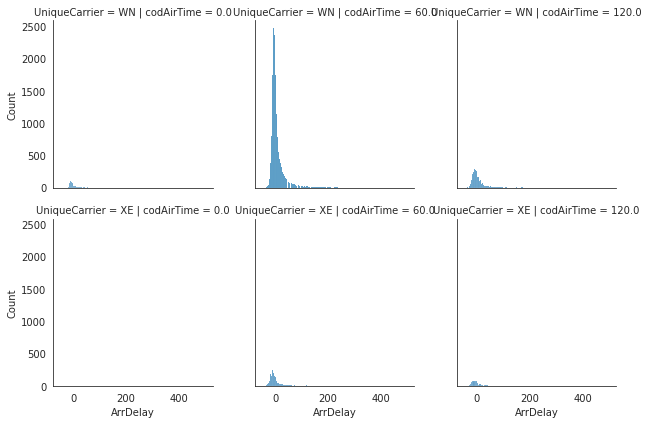

In [84]:
sns.set_style('white')
df3= df[df.AirTime < 100]
 
g = sns.FacetGrid(df3, col ='codAirTime' , row ='UniqueCarrier' )
g.map(sns.histplot, 'ArrDelay' );

Vemos que cuanto el **AirTime** es mayor el delay disminuye, que con el otro gráfico no lo podíamos ver

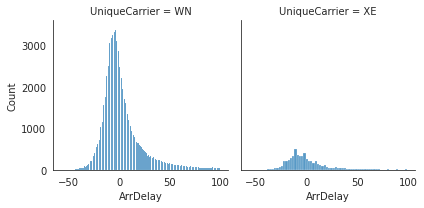

In [81]:
g = sns.FacetGrid(df3, col = 'UniqueCarrier')
g.map(sns.histplot, 'ArrDelay' );

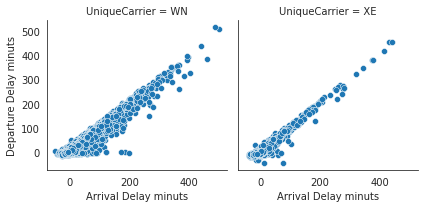

In [93]:
g = sns.FacetGrid(df3, col = 'UniqueCarrier', palette ='prism')
g.map_dataframe(sns.scatterplot, x= 'ArrDelay' , y = 'DepDelay' )
g.set_axis_labels('Arrival Delay minuts', 'Departure Delay minuts')

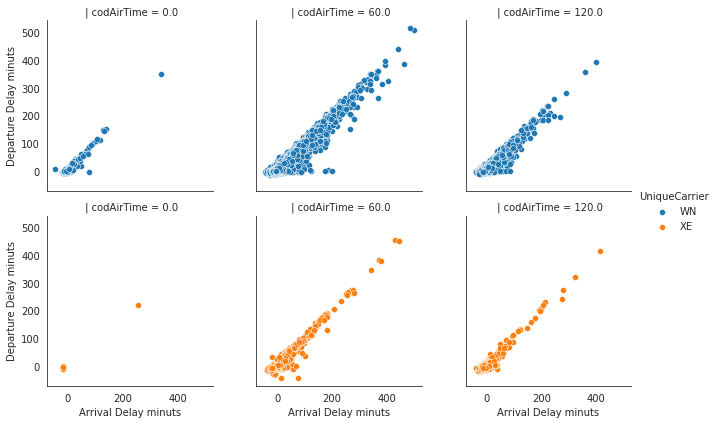

In [97]:
g = sns.FacetGrid(df3, col ='codAirTime' , row= 'UniqueCarrier', hue= 'UniqueCarrier')
g.map_dataframe(sns.scatterplot, x= 'ArrDelay' , y = 'DepDelay' )
g.set_axis_labels('Arrival Delay minuts', 'Departure Delay minuts')
g.add_legend()
g.set_titles(row_template ='')